# Zadanie 2

Wykonaj mapę tematyczną zawierającą informację o demografii w poszczególnych powiatach w Polsce. Użyj do tego mapy powiaty z bazy "powiaty.gpkg" oraz informacji z GUS (https://bdl.stat.gov.pl/BDL/dane/podgrup/teryt) (plik csv). 

Użyj złączenia geodataframe z plikiem csv. Do połączenia pól użyj kodu jednostki terytorialnej. Do wybrania fragmentu kodu funkcji: string[..:..]. 

Wynik pokaż na mapie tematycznej używając skali barwnej. Wyświetl tabelę "dataframe" zawierającą dwie kolumny: nazwa powiatu, ilość mieszkańców. Posortuj ją od wartości największych do najmniejszych.

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot
import pandas as pd

### Czytanie powiatów

In [57]:
powiaty="powiaty.gpkg"

powiaty_gdf = gpd.read_file(powiaty, layer='powiaty')
powiaty_gdf.head()

,iip_przest,iip_identy,iip_wersja,jpt_sjr_ko,jpt_kod_je,jpt_nazwa_,jpt_nazw01,jpt_organ_,jpt_orga01,jpt_jor_id,...,id_bufora_,id_bufor01,id_technic,jpt_opis,jpt_sps_ko,gra_ids,status_obi,opis_bledu,typ_bledu,geometry
0,PL.PZGIK.200,f87cae01-4621-41f4-b768-c777cf94d1d8,2012-09-27T08:01:01+02:00,POW,1812,powiat niżański,None,None,NZN,NaN,...,NaN,13878.0,NaN,829081,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((711095.856 277431.597, 711101...."
1,PL.PZGIK.200,f322275e-1c48-431f-889e-8bb0ccb46e81,2012-09-27T08:01:01+02:00,POW,1813,powiat przemyski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829082,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((734488.435 209795.384, 734490...."
2,PL.PZGIK.200,59e7c5a7-8597-4c55-812a-b30932c08dd2,2012-09-27T08:01:01+02:00,POW,1814,powiat przeworski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829083,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((731943.256 233158.050, 731989...."
3,PL.PZGIK.200,e86b1e71-8958-42ee-bec5-ca3c87907bc8,2012-09-27T08:01:01+02:00,POW,1815,powiat ropczycko-sędziszowski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829084,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((676562.888 239118.997, 676567...."
4,PL.PZGIK.200,7f2af54d-150f-4b9f-b9fb-d2ce1b04166e,2012-09-27T08:01:01+02:00,POW,1816,powiat rzeszowski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829085,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((696894.808 237348.347, 696909...."


### Wczytanie ludności

In [58]:
gestosc_df = pd.read_csv('LUDN_2425_CTAB_20210108183351.csv', sep=';')
gestosc_df = gestosc_df[gestosc_df['Nazwa'].str.contains('Powiat')]
gestosc_df["Kod"] = gestosc_df["Kod"].astype(str)
gestosc_df

,Kod,Nazwa,ludność na 1 km2;2019;[osoba],Unnamed: 3
2,201000,Powiat bolesławiecki,69,NaN
11,202000,Powiat dzierżoniowski,211,NaN
23,203000,Powiat głogowski,201,NaN
30,204000,Powiat górowski,47,NaN
39,205000,Powiat jaworski,86,NaN
...,...,...,...,...
4136,3217000,Powiat wałecki,37,NaN
4148,3218000,Powiat łobeski,34,NaN
4162,3261000,Powiat m.Koszalin,1089,NaN
4164,3262000,Powiat m.Szczecin,1337,NaN


### Złączenie ramek danych

In [59]:
powiaty_gdf["Kod"] = powiaty_gdf["jpt_kod_je"] + "000"
powiaty_gdf["Kod"] = powiaty_gdf["Kod"]
powiaty_gdf["Kod"] = powiaty_gdf["Kod"].str.lstrip("0")

In [60]:
df = powiaty_gdf.merge(gestosc_df, on="Kod", how="left")
df = df.rename(columns={"ludność na 1 km2;2019;[osoba]": "zaludnienie"})
df.head()

,iip_przest,iip_identy,iip_wersja,jpt_sjr_ko,jpt_kod_je,jpt_nazwa_,jpt_nazw01,jpt_organ_,jpt_orga01,jpt_jor_id,...,jpt_sps_ko,gra_ids,status_obi,opis_bledu,typ_bledu,geometry,Kod,Nazwa,zaludnienie,Unnamed: 3
0,PL.PZGIK.200,f87cae01-4621-41f4-b768-c777cf94d1d8,2012-09-27T08:01:01+02:00,POW,1812,powiat niżański,None,None,NZN,NaN,...,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((711095.856 277431.597, 711101....",1812000,Powiat niżański,85,NaN
1,PL.PZGIK.200,f322275e-1c48-431f-889e-8bb0ccb46e81,2012-09-27T08:01:01+02:00,POW,1813,powiat przemyski,None,None,NZN,NaN,...,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((734488.435 209795.384, 734490....",1813000,Powiat przemyski,61,NaN
2,PL.PZGIK.200,59e7c5a7-8597-4c55-812a-b30932c08dd2,2012-09-27T08:01:01+02:00,POW,1814,powiat przeworski,None,None,NZN,NaN,...,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((731943.256 233158.050, 731989....",1814000,Powiat przeworski,112,NaN
3,PL.PZGIK.200,e86b1e71-8958-42ee-bec5-ca3c87907bc8,2012-09-27T08:01:01+02:00,POW,1815,powiat ropczycko-sędziszowski,None,None,NZN,NaN,...,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((676562.888 239118.997, 676567....",1815000,Powiat ropczycko-sędziszowski,136,NaN
4,PL.PZGIK.200,7f2af54d-150f-4b9f-b9fb-d2ce1b04166e,2012-09-27T08:01:01+02:00,POW,1816,powiat rzeszowski,None,None,NZN,NaN,...,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((696894.808 237348.347, 696909....",1816000,Powiat rzeszowski,148,NaN


## Wizualizacja

<AxesSubplot:>

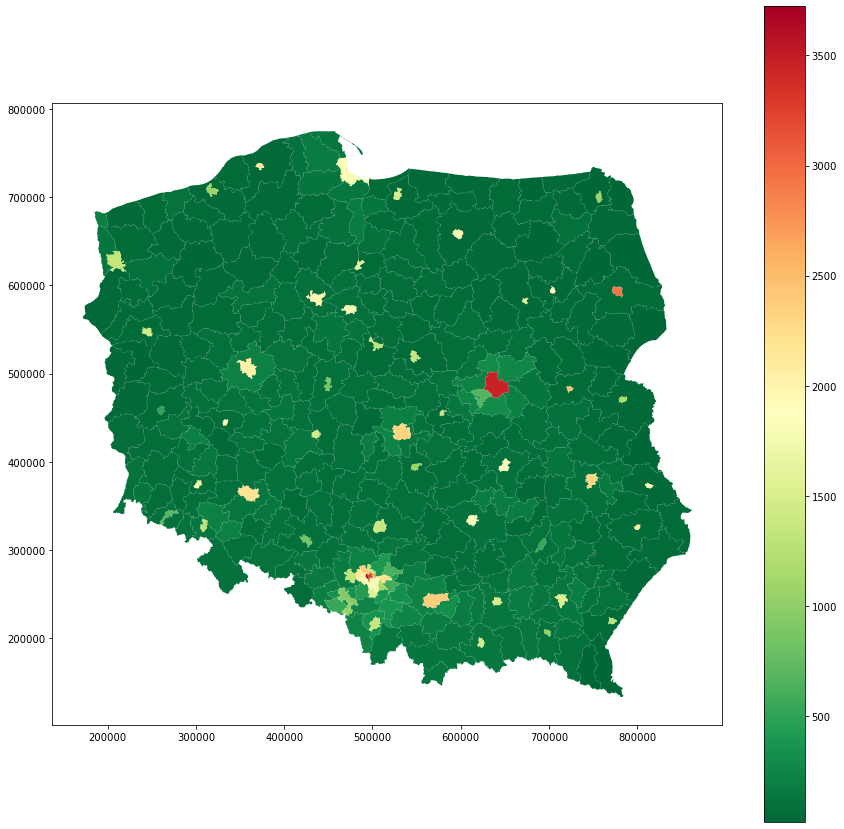

In [61]:
df.plot(
    column="zaludnienie",
    cmap="RdYlGn_r",
    legend=True,
    figsize=(15, 15),
)

## Sortowanie danych

In [64]:
df[["jpt_nazwa_", "Kod", "zaludnienie"]].sort_values(by='zaludnienie', ascending=False)

,jpt_nazwa_,Kod,zaludnienie
276,powiat Świętochłowice,2476000,3723
151,powiat Warszawa,1465000,3462
322,powiat Chorzów,2463000,3243
198,powiat Białystok,2061000,2913
275,powiat Siemianowice Śląskie,2474000,2621
...,...,...,...
190,powiat moniecki,2008000,29
204,powiat suwalski,2012000,27
216,powiat hajnowski,2005000,26
172,powiat sejneński,2009000,23
